In [25]:
#import needed Python libraries
import numpy as np
import csv
import random
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scistats
import math
import pylab
import statsmodels as sm

#graphics parameters of the notebook
# display graphs inline
%matplotlib inline

# Make graphs prettier
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 400)
pd.set_option('plotting.matplotlib.register_converters', True)

# Make the fonts bigger
plt.rc('figure', figsize=(14, 7))
plt.rc('font', family='normal', weight='bold', size=15)

In [27]:
#inegrate data from 2009-2010 to 2018-2019 seasons from different files
data_18_19 = pd.read_csv("./data/2018_2019.csv", parse_dates=True)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
data_17_18 = pd.read_csv("./data/2017_2018.csv", parse_dates=True)
data_16_17 = pd.read_csv("./data/2016_2017.csv", parse_dates=True)
data_15_16 = pd.read_csv("./data/2015_2016.csv", parse_dates=True)
data_14_15 = pd.read_csv("./data/2014_2015.csv", parse_dates=True)
data_13_14 = pd.read_csv("./data/2013_2014.csv", parse_dates=True)
data_12_13 = pd.read_csv("./data/2012_2013.csv", parse_dates=True)
data_11_12 = pd.read_csv("./data/2011_2012.csv", parse_dates=True)
data_10_11 = pd.read_csv("./data/2010_2011.csv", parse_dates=True)
data_09_10 = pd.read_csv("./data/2009_2010.csv", parse_dates=True)
data_08_09 = pd.read_csv("./data/2008_2009.csv", parse_dates=True)
#data_07_08 = pd.read_csv("./data/2007_2008.csv", parse_dates=True)
#data_06_07 = pd.read_csv("./data/2006_2007.csv", parse_dates=True)
#data_05_06 = pd.read_csv("./data/2005_2006.csv", parse_dates=True)



#test about data consistency for all files
for df in [data_18_19, data_17_18, data_16_17, data_15_16, data_14_15, data_13_14, data_12_13, data_11_12, data_10_11, data_09_10, data_08_09]:
    print("Number of df columns : " + str(len(data_18_19.columns)))

#integrate data in a single df
raw_data = pd.concat([data_18_19, data_17_18, data_16_17, data_15_16, data_14_15, data_13_14, data_12_13, data_11_12, data_10_11, data_09_10, data_08_09])

print(raw_data)

Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
    17Div      Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  ...  GBA   BSH  BSD   BSA   SBH  SBD   SBA
0      E0  10/08/18    Man United       Leicester     2     1   H  ...  NaN   NaN  NaN   NaN   NaN  NaN   NaN
1      E0  11/08/18   Bournemouth         Cardiff     2     0   H  ...  NaN   NaN  NaN   NaN   NaN  NaN   NaN
2      E0  11/08/18        Fulham  Crystal Palace     0     2   A  ...  NaN   NaN  NaN   NaN   NaN  NaN   NaN
3      E0  11/08/18  Huddersfield         Chelsea     0     3   A  ...  NaN   NaN  NaN   NaN   NaN  NaN   NaN
4      E0  11/08/18     Newcastle       Tottenham     1     2   A  ...  NaN   NaN  NaN   NaN   NaN  NaN   NaN
..    ...       ...           ...             ...   ..

In [28]:
#Select useful features for datavisualization and analysis purposes
E0_data = raw_data[["Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG",
                    "FTR", "HTAG", 'B365A', 'B365D', 'B365H', 'BSA', 
                    'BSD', 'BSH', 'BWA', 'BWD', 'BWH', 'GBA', 'GBD',
                    'GBH', 'IWA', 'IWD', 'IWH', 'LBA', 'LBD', 'LBH',
                    'PSA', 'PSD', 'PSH', 'SBA', 'SBD', 'SBH', 'SJA',
                    'SJD', 'SJH', 'VCA', 'VCD', 'VCH', 'WHA','WHD', 'WHH']]

#convert date format to YYYY-MM-DD classic format
E0_data.Date = E0_data.Date.map(lambda x : "20" + x[6:8] + "-" + x[3:5] + "-" + x[0:2])

#sort data by date
E0_data.sort_values('Date', inplace=True)

#reset data indexes
E0_data = E0_data.reset_index(drop=True)

#create matchID column
E0_data['matchID'] = E0_data.index

#create season feature
E0_data['Season'] = 0
E0_data.Season = E0_data.Date.map(lambda x : int(x[0:4]) if int(x[5:7]) > 6 else int(x[0:4]) - 1)

#null values test
E0_data.isnull().any()

#create teams list
teams = E0_data['HomeTeam'].unique()
print(teams)

#create seasons list
seasons = np.sort(E0_data['Season'].unique())
print(seasons)

#create dictionary containing teams list by season
teams_by_season = {season : E0_data[E0_data['Season'] == season]['HomeTeam'].unique() for season in seasons}



['Arsenal' 'Bolton' 'Everton' 'Hull' 'Middlesbrough' 'Sunderland'
 'West Ham' 'Chelsea' 'Aston Villa' 'Man United' 'Liverpool' 'Newcastle'
 'Tottenham' 'West Brom' 'Blackburn' 'Fulham' 'Stoke' 'Man City' 'Wigan'
 'Portsmouth' 'Wolves' 'Birmingham' 'Burnley' 'Blackpool' 'QPR' 'Swansea'
 'Norwich' 'Reading' 'Southampton' 'Crystal Palace' 'Cardiff' 'Leicester'
 'Bournemouth' 'Watford' 'Brighton' 'Huddersfield']
[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [29]:
#match day feature construction for HomeTeam and AwayTeam (1st match of a season --> 1, last --> 38 because 20 team play by season)
E0_HT_grpby = E0_data.groupby('HomeTeam')[['Date']]
E0_AT_grpby = E0_data.groupby('AwayTeam')[['Date']]

def fxyH(row):
    x = row['HomeTeam']
    y = row['Date']
    df1 = E0_HT_grpby.get_group(x)
    df2 = E0_AT_grpby.get_group(x)
    df1 = df1[df1['Date'] < y]
    df2 = df2[df2['Date'] < y]
    day = (1 + len(df1) + len(df2)) % 38
    return 38 if day == 0 else day 

def fxyA(row):
    x = row['AwayTeam']
    y = row['Date']
    df1 = E0_HT_grpby.get_group(x)
    df2 = E0_AT_grpby.get_group(x)
    df1 = df1[df1['Date'] < y]
    df2 = df2[df2['Date'] < y]
    day = (1 + len(df1) + len(df2)) % 38
    return 38 if day == 0 else day 

E0_data['HomeTeamDay'] = E0_data.apply(fxyH, axis=1)
E0_data['AwayTeamDay'] = E0_data.apply(fxyA, axis=1)

E0_data['ones'] = 1
for season in seasons:
    for team in teams_by_season[season]:
        sH = E0_data[(E0_data['HomeTeam'] == team) & (E0_data['Season'] == season)]['ones']
        E0_data.loc[sH.index, 'HomeTeamHomeDay'] = sH.cumsum()
        
        sA = E0_data[(E0_data['AwayTeam'] == team) & (E0_data['Season'] == season)]['ones']
        E0_data.loc[sA.index, 'AwayTeamAwayDay'] = sA.cumsum()
        
        
def resultConverter(A):
    if A == 'H':
        return 'W'
    elif A =='A':
        return 'L'
    else:
        return 'D'

def resultInverser(A):
    if A == 'W':
        return 'L'
    elif A == 'L':
        return 'W'
    else:
        return 'D'
def ordinalResultConverter(A):
    if A == 'W':
        return 1
    elif A == 'L':
        return 0
    else:
        return 0.5
    
#make dummies variables for FTR (result of match), HW = Home Win, AW = Away Win, D = draw
E0_data['HW'] = E0_data.FTR.map(lambda x : 1 if x == 'H' else 0)
E0_data['AW'] = E0_data.FTR.map(lambda x : 1 if x == 'A' else 0)
E0_data['D']= E0_data.FTR.map(lambda x : 1 if x == 'D' else 0)

#make 2 different variable for the result of a match : 1 for the home team point of view, the other for the away team pt of view
E0_data['HR'] = E0_data.FTR.map(lambda x : resultConverter(x))
E0_data['AR'] = E0_data.HR.map(lambda x : resultInverser(x))

#make ordinal variable for the home team point of view result (1 = win, 0.5 = Draw, 0 = loss)
E0_data['ordinalHR'] = E0_data.HR.map(lambda x : ordinalResultConverter(x))   

In [30]:

grp_by_HT = E0_data.groupby('HomeTeam')
grp_by_AT = E0_data.groupby('AwayTeam')

grp_by_HT_and_season = E0_data.groupby(['HomeTeam', 'Season'])
grp_by_AT_and_season = E0_data.groupby(['AwayTeam', 'Season'])

#past performance features engineering
for team in teams:
    
    #we retrieve results series of the team
    teamHomeResults_s = grp_by_HT.get_group(team)['HR']
    teamAwayResults_s = grp_by_AT.get_group(team)['AR']
    #combine these 2 series and sort the obtained serie
    teamResults_s = pd.concat([teamHomeResults_s, teamAwayResults_s]).sort_index()

    #(i) compute k_last_HR and k_last_AR --> 6 features
    lag1TeamResults_d = teamResults_s.shift(1).to_dict()
    lag2TeamResults_d = teamResults_s.shift(2).to_dict()
    lag3TeamResults_d = teamResults_s.shift(3).to_dict()
    
    #k_last_HTR and k_last_ATR are just shifted versions of the results series
    E0_data.loc[teamHomeResults_s.index,'1_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag1TeamResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'2_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag2TeamResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'3_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag3TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'1_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag1TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'2_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag2TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'3_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag3TeamResults_d[x])
    
    #(ii) Compute k_last_HTRH and k_last ATAR --> 4 features
    #we need here to diferentiate home results and past results. Python dictionaries allows the program to access to
    #needed data faster than with a Pandas serie
    lag1TeamHomeResults_d = teamHomeResults_s.shift(1).to_dict()
    lag2TeamHomeResults_d = teamHomeResults_s.shift(2).to_dict()
    lag1TeamAwayResults_d = teamAwayResults_s.shift(1).to_dict()
    lag2TeamAwayResults_d = teamAwayResults_s.shift(2).to_dict()
    
    E0_data.loc[teamHomeResults_s.index,'1_last_HTHR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag1TeamHomeResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'2_last_HTHR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag2TeamHomeResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'1_last_ATAR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag1TeamAwayResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'2_last_ATAR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag2TeamAwayResults_d[x])
    
    #(iii) rates based features : we need to get only season specific results series (to avoid taking previous season results into season rates)
    for season in seasons:
        
        if team in teams_by_season[season]:
            #retrieve season specific results serie (1 win serie, 1 draw serie the loss  will be computed thanks to
            #the 2 others)
            teamHomeResultsW_s = grp_by_HT_and_season.get_group((team,season))['HW']
            teamAwayResultsW_s = grp_by_AT_and_season.get_group((team,season))['AW']
            teamResultsW_s = pd.concat([teamHomeResultsW_s, teamAwayResultsW_s]).sort_index()

            teamHomeResultsD_s = grp_by_HT_and_season.get_group((team,season))['D']
            teamAwayResultsD_s = grp_by_AT_and_season.get_group((team,season))['D']
            teamResultsD_s = pd.concat([teamHomeResultsD_s, teamAwayResultsD_s]).sort_index()
        
            #(0) compute HW rates, HL rates, AW rates, LW rates since begining of season
            teamResultsWCumul_d = teamResultsW_s.shift(1).cumsum().to_dict()
            teamResultsDCumul_d = teamResultsD_s.shift(1).cumsum().to_dict()

            #(i) compute 7_HTW_rate, 12_HTW_rate, 7_HTD_rate, 12_HTD_rate, 7_ATW_rate, 12_ATW_rate, 7_ATD_rate, 12_ATD_rate --> 8 features
            win7TeamResultsW_d = teamResultsW_s.shift(1).rolling(window = 7, min_periods = 5).mean().to_dict()
            win12TeamResultsW_d = teamResultsW_s.shift(1).rolling(window = 12, min_periods = 8).mean().to_dict()
            win7TeamResultsD_d = teamResultsD_s.shift(1).rolling( window = 7, min_periods = 5).mean().to_dict()
            win12TeamResultsD_d = teamResultsD_s.shift(1).rolling( window = 12, min_periods = 8).mean().to_dict()
        
            E0_data.loc[teamHomeResultsW_s.index,'HTW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamResultsWCumul_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'ATW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamResultsWCumul_d[x])
            E0_data.loc[teamHomeResultsW_s.index,'HTD_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamResultsDCumul_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'ATD_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamResultsDCumul_d[x])
        
            E0_data.loc[teamHomeResultsW_s.index,'7_HTW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win7TeamResultsW_d[x])
            E0_data.loc[teamHomeResultsW_s.index,'12_HTW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win12TeamResultsW_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'7_ATW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win7TeamResultsW_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'12_ATW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win12TeamResultsW_d[x])
        
            E0_data.loc[teamHomeResultsD_s.index,'7_HTD_rate'] = E0_data.loc[teamHomeResultsD_s.index,:].index.map(lambda x : win7TeamResultsD_d[x])
            E0_data.loc[teamHomeResultsD_s.index,'12_HTD_rate'] = E0_data.loc[teamHomeResultsD_s.index,:].index.map(lambda x : win12TeamResultsD_d[x])
            E0_data.loc[teamAwayResultsD_s.index,'7_ATD_rate'] = E0_data.loc[teamAwayResultsD_s.index,:].index.map(lambda x : win7TeamResultsD_d[x])
            E0_data.loc[teamAwayResultsD_s.index,'12_ATD_rate'] = E0_data.loc[teamAwayResultsD_s.index,:].index.map(lambda x : win12TeamResultsD_d[x])

        #(ii) compute 5_HTHW_rate and 5_ATAW_rate
        win5TeamResultsHomeW_d = teamHomeResultsW_s.shift(1).rolling( window = 5, min_periods = 3).mean().to_dict()
        win5TeamResultsAwayW_d = teamAwayResultsW_s.shift(1).rolling( window = 5, min_periods = 3).mean().to_dict()
        E0_data.loc[teamHomeResultsW_s.index,'5_HTHW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win5TeamResultsHomeW_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'5_ATAW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win5TeamResultsAwayW_d[x])
        
        #(iii) compute HTHW_rate, ATAW_rate, HTHD_rate, ATAD_rate
        teamHomeResultsCumulW_d = teamHomeResultsW_s.shift(1).cumsum().to_dict()
        teamHomeResultsCumulD_d = teamHomeResultsD_s.shift(1).cumsum().to_dict()
        teamAwayResultsCumulW_d = teamAwayResultsW_s.shift(1).cumsum().to_dict()
        teamAwayResultsCumulD_d = teamAwayResultsD_s.shift(1).cumsum().to_dict()
        E0_data.loc[teamHomeResultsW_s.index,'HTHW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamHomeResultsCumulW_d[x])
        E0_data.loc[teamHomeResultsW_s.index,'HTHD_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamHomeResultsCumulD_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'ATAW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamAwayResultsCumulW_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'ATAD_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamAwayResultsCumulD_d[x])


        
#compute missing features k_XTL_rate thanks to the k_XTW_rate and k_XTD_rate features
E0_data.loc[:,'7_HTL_rate'] = 1 - (E0_data['7_HTW_rate'] + E0_data['7_HTD_rate'])
E0_data.loc[:,'12_HTL_rate'] = 1 - (E0_data['7_HTW_rate'] + E0_data['7_HTD_rate'])
E0_data.loc[:,'7_ATL_rate'] = 1 - (E0_data['7_ATW_rate'] + E0_data['7_ATD_rate'])
E0_data.loc[:,'12_ATL_rate'] = 1 - (E0_data['7_ATW_rate'] + E0_data['7_ATD_rate'])

#compute missing HTL_rate, ATL_rate with features with the wins and draws features
E0_data.loc[:,'HTW_rate'] = E0_data['HTW_rate']/E0_data['HomeTeamDay']
E0_data.loc[:,'ATW_rate'] = E0_data['ATW_rate']/E0_data['AwayTeamDay']
E0_data.loc[:,'HTD_rate'] = E0_data['HTD_rate']/E0_data['HomeTeamDay']
E0_data.loc[:,'ATD_rate'] = E0_data['ATD_rate']/E0_data['AwayTeamDay']
E0_data.loc[:,'HTL_rate'] = 1 - (E0_data['HTW_rate'] + E0_data['HTD_rate'])
E0_data.loc[:,'ATL_rate'] = 1 - (E0_data['ATW_rate'] + E0_data['ATD_rate'])

#we finish to compute HTHW_rate, ..., ATAD_rate features and compute corresponding loss features
E0_data.loc[:,'HTHW_rate'] = E0_data['HTHW_rate']/E0_data['HomeTeamHomeDay']
E0_data.loc[:,'ATAW_rate'] = E0_data['ATAW_rate']/E0_data['AwayTeamAwayDay']
E0_data.loc[:,'HTHD_rate'] = E0_data['HTHD_rate']/E0_data['HomeTeamHomeDay']
E0_data.loc[:,'ATAD_rate'] = E0_data['ATAD_rate']/E0_data['AwayTeamAwayDay']
E0_data.loc[:,'HTHL_rate'] = 1 - (E0_data['HTHW_rate'] + E0_data['HTHD_rate'])
E0_data.loc[:,'ATAL_rate'] = 1 - (E0_data['ATAW_rate'] + E0_data['ATAD_rate'])


In [31]:
#Elo ranking method parameters
k = 20.0
d = 400.0
c = 10.0

#Initialization of output containers
ELO_dict = dict()
gammaHT_dict = dict()
gammaAT_dict = dict()

#intermediate data containers initilization
latest_update_d = dict() #contains latest updates in date of ELO_dict
prev_ELO_score_d = dict() #contains latest ELO_score given to a team for computing new one

prev_season_teams = [team for team in teams] #contains list of teams for the current season
last_teams_ELO_av = 0.0 #contains ELO average of last previous season teams

for team in teams:
    latest_update_d[team] = '2001-01-01'
    prev_ELO_score_d[team] = 0.0

for season in E0_data.Season.unique():
    season_match_dates = E0_data[E0_data['Season'] == season].Date.unique()
    season_teams = E0_data[E0_data['Season'] == season].HomeTeam.unique()
    last_season_date = season_match_dates[len(season_match_dates) - 1]
    
    for Steam in season_teams:
        if not (Steam in prev_season_teams):
            prev_ELO_score_d[Steam] = last_teams_ELO_av
            
    for date in season_match_dates:
        for team in teams:
            if not ((team in E0_data[E0_data['Date'] == date]['HomeTeam'].values) | (team in E0_data[E0_data['Date'] == date]['AwayTeam'].values)):
                ELO_dict[(team, date)] = prev_ELO_score_d[team]
                latest_update_d[team] = date
            else:
                if latest_update_d[team] < date:
                    Hteam = E0_data[(E0_data['Date'] == date) & ((E0_data['HomeTeam'] == team) | (E0_data['AwayTeam'] == team))]['HomeTeam'].values[0]
                    Ateam = E0_data[(E0_data['Date'] == date) & ((E0_data['HomeTeam'] == team) | (E0_data['AwayTeam'] == team))]['AwayTeam'].values[0]
            
                    l0H = prev_ELO_score_d[Hteam]
                    l0A = prev_ELO_score_d[Ateam]
                    gammaH = 1.0/(1.0 + c**((l0A - l0H)/d))
                    gammaA = 1.0 - gammaH
                    alphaH = E0_data[(E0_data['Date'] == date) & (E0_data['HomeTeam'] == Hteam)]['ordinalHR'].values[0]
                    alphaA = 1 - alphaH
            
                    #compute new scores
                    new_HT_ELO_score = l0H + k * (alphaH - gammaH)
                    new_AT_ELO_score = l0A + k * (alphaA - gammaA)

                    #put new scores in ELO_dict
                    ELO_dict[(Hteam, date)] = new_HT_ELO_score
                    ELO_dict[(Ateam, date)] = new_AT_ELO_score
                    gammaHT_dict[(Hteam, date)] = gammaH
                    gammaAT_dict[(Ateam, date)] = gammaA
                    latest_update_d[Hteam] = date
                    latest_update_d[Ateam] = date
            
                    #update prev_ELO_score_d and latest_update_d
                    prev_ELO_score_d[Hteam] = new_HT_ELO_score
                    prev_ELO_score_d[Ateam] = new_AT_ELO_score
        
        if date == last_season_date:
            ELOs = np.array([prev_ELO_score_d[Steam] for Steam in season_teams])
            ELOs.sort()
            last_teams_ELO_av = np.mean(ELOs[0:-17])
            prev_season_teams = season_teams
            
            #make HTeamEloScore, ATeamEloScore and gammaHome features from previously computed dictionaries

def HomeTeamEloScore(row):
    return ELO_dict[(row['HomeTeam'], row['Date'])]

def AwayTeamEloScore(row):
    return ELO_dict[(row['AwayTeam'], row['Date'])]

def gammaHTeamDate(row):
    return gammaHT_dict[(row['HomeTeam'], row['Date'])]

#compute resulting Elo scores important features
E0_data.loc[:,'HTeamEloScore'] = E0_data.apply(HomeTeamEloScore, axis=1) 
E0_data.loc[:,'ATeamEloScore'] = E0_data.apply(AwayTeamEloScore, axis=1) 
E0_data.loc[:,'gammaHome'] = E0_data.apply(gammaHTeamDate, axis=1)


In [32]:

for team in teams:
    homeMatchDates_s = E0_data[E0_data['HomeTeam'] == team]['Date']
    awayMatchDates_s = E0_data[E0_data['AwayTeam'] == team]['Date']
    matchDates_s = pd.concat([homeMatchDates_s, awayMatchDates_s]).sort_index()
    lastMatchDates_s = matchDates_s.shift(1)
    matchDates = matchDates_s.values
        
    E0_data.loc[E0_data['HomeTeam'] == team, 'HTLastMatchDate'] = E0_data.loc[E0_data['HomeTeam'] == team].index.map(lambda x : lastMatchDates_s[x])
    E0_data.loc[E0_data['AwayTeam'] == team, 'ATLastMatchDate'] = E0_data.loc[E0_data['AwayTeam'] == team].index.map(lambda x : lastMatchDates_s[x])
    
def HTdaysBetweenDates(row):
    if not (pd.isnull(row['HTLastMatchDate'])):
        currDate = pd.to_datetime(row['Date'])
        prevDate = pd.to_datetime(row['HTLastMatchDate'])
        ndays = (currDate - prevDate).days 
        if ndays < 20:
            return ndays
        else: 
            return np.nan
    else:
        return np.nan 
    
def ATdaysBetweenDates(row):
    if not (pd.isnull(row['ATLastMatchDate'])):
        currDate = pd.to_datetime(row['Date'])
        prevDate = pd.to_datetime(row['ATLastMatchDate'])
        return (currDate - prevDate).days
    else:
        return np.nan 
    
E0_data.loc[:, 'HTdaysSinceLastMatch'] = E0_data.apply(HTdaysBetweenDates, axis=1)
E0_data.loc[:, 'ATdaysSinceLastMatch'] = E0_data.apply(ATdaysBetweenDates, axis=1)
E0_data.loc[:,'DaysSinceLastMatchRate'] = E0_data['HTdaysSinceLastMatch'].astype(float)/E0_data['ATdaysSinceLastMatch'].astype(float)


In [33]:

E0_data['1_last_HTR_isW'] = E0_data['1_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_HTR_isL'] = E0_data['1_last_HTR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_HTR_isW'] = E0_data['2_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_HTR_isL'] = E0_data['2_last_HTR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['3_last_HTR_isW'] = E0_data['3_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['3_last_HTR_isL'] = E0_data['3_last_HTR'].map(lambda x : 1 if x == 'L' else 0) 

E0_data['1_last_ATR_isW'] = E0_data['1_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_ATR_isL'] = E0_data['1_last_ATR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_ATR_isW'] = E0_data['2_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_ATR_isL'] = E0_data['2_last_ATR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['3_last_ATR_isW'] = E0_data['3_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['3_last_ATR_isL'] = E0_data['3_last_ATR'].map(lambda x : 1 if x == 'L' else 0) 

E0_data['1_last_HTHR_isW'] = E0_data['1_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_HTHR_isL'] = E0_data['1_last_HTHR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_HTHR_isW'] = E0_data['2_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_HTHR_isL'] = E0_data['2_last_HTHR'].map(lambda x : 1 if x == 'L' else 0)

E0_data['1_last_ATAR_isW'] = E0_data['1_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_ATAR_isL'] = E0_data['1_last_ATAR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_ATAR_isW'] = E0_data['2_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_ATAR_isL'] = E0_data['2_last_ATAR'].map(lambda x : 1 if x == 'L' else 0)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


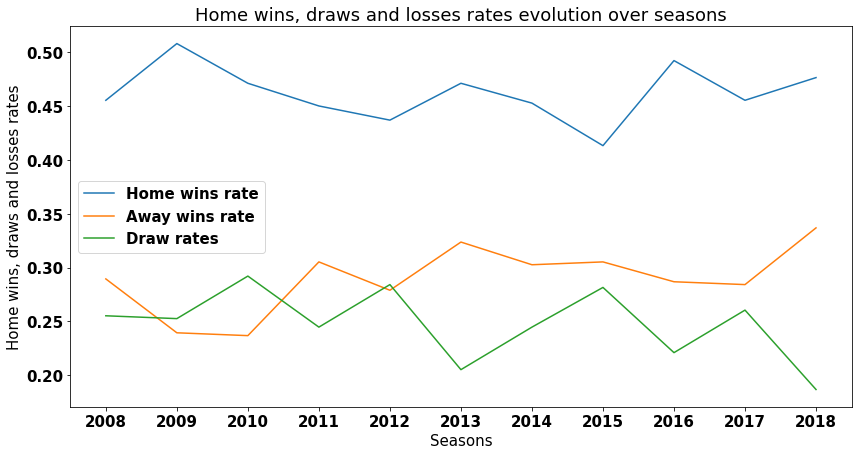

In [34]:
#Home wins, Away wins and draws rates variations over seasons
HW_rates = []
AW_rates = []
D_rates = []

for season in seasons:
    season_data = E0_data[E0_data['Season'] == season]
    total_matches_nb = len(season_data.index)
    HW_rate = float(len(season_data[season_data['FTR'] == 'H'].index))/float(total_matches_nb)
    AW_rate = float(len(season_data[season_data['FTR'] == 'A'].index))/float(total_matches_nb)
    D_rate = float(len(season_data[season_data['FTR'] == 'D'].index))/float(total_matches_nb)
    HW_rates.append(HW_rate)
    AW_rates.append(AW_rate)
    D_rates.append(D_rate)

plt.figure()
plt.plot(seasons, HW_rates, label="Home wins rate")
plt.plot(seasons, AW_rates, label="Away wins rate")
plt.plot(seasons, D_rates, label="Draw rates")
plt.legend()
plt.xticks([int(season) for season in seasons], seasons)
plt.xlabel("Seasons")
plt.ylabel("Home wins, draws and losses rates")
plt.title("Home wins, draws and losses rates evolution over seasons")

#global wins, draws and losses rates
HW_rate = float(len(E0_data[E0_data['HR'] == 'W'].index))/float(len(E0_data.index))
HL_rate = float(len(E0_data[E0_data['HR'] == 'L'].index))/float(len(E0_data.index))
HD_rate = float(len(E0_data[E0_data['HR'] == 'D'].index))/float(len(E0_data.index))
rates = [HW_rate, HL_rate, HD_rate]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


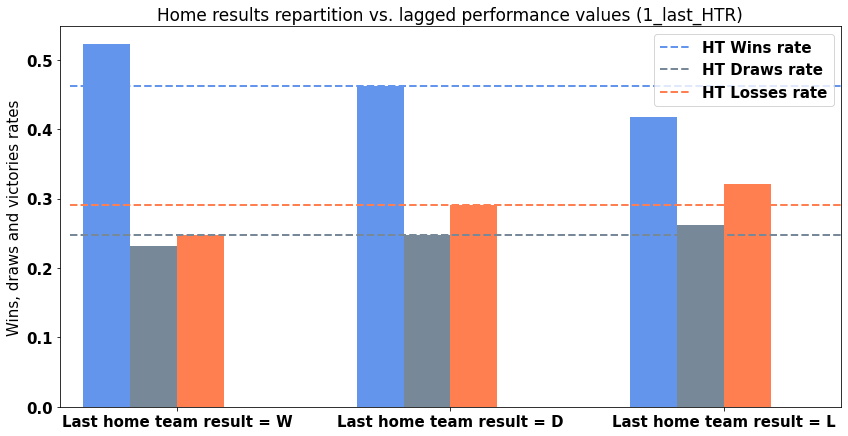

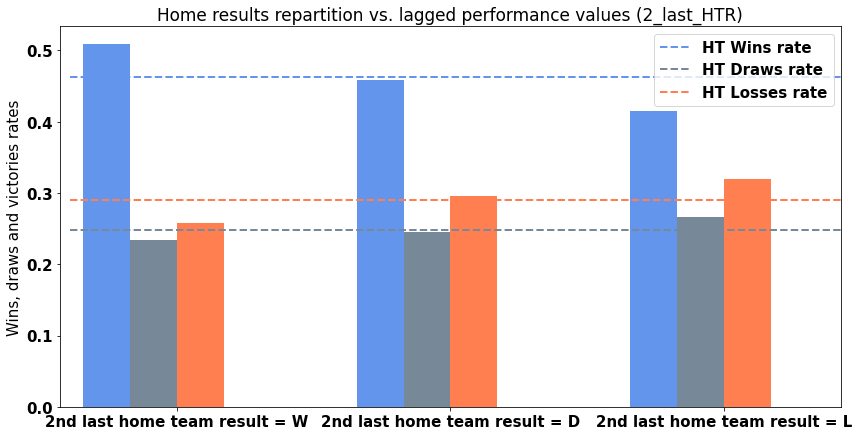

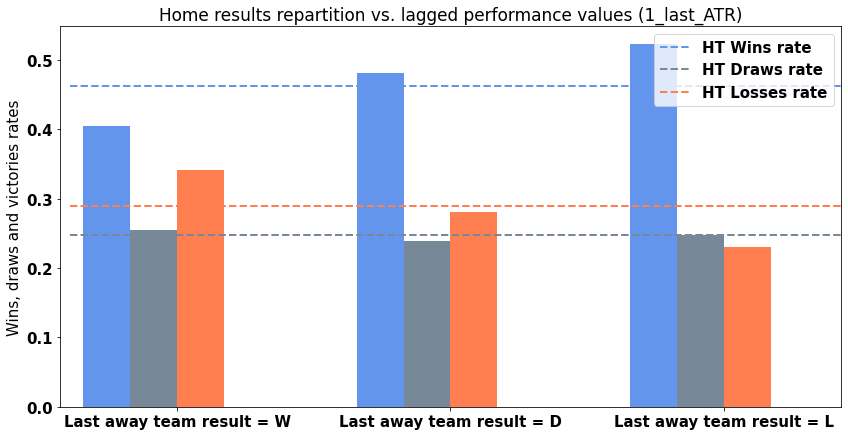

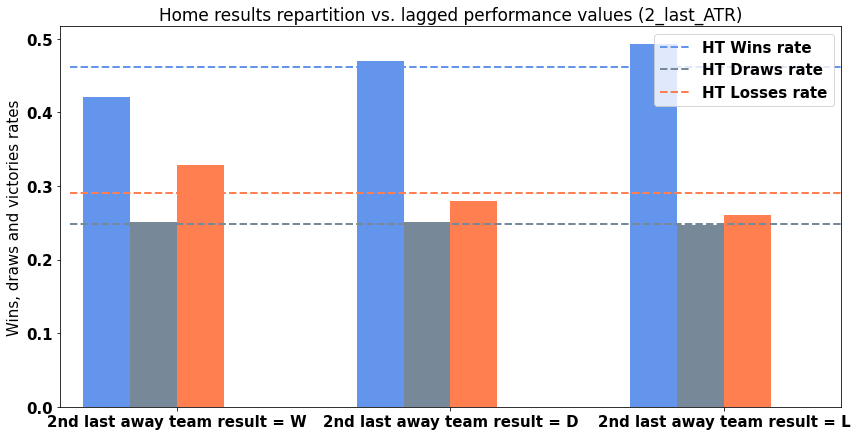

In [35]:

width = 0.12
xticks = np.array([0.3, 1.0, 1.7])
xticksLabels = ['0.0 - 0.2', '0.2 - 0.4', '0.4 - 0.6']
xlabels = [["Last home team result = W", "Last home team result = D", "Last home team result = L"],
           ["2nd last home team result = W", "2nd last home team result = D", "2nd last home team result = L"],
           ["Last away team result = W", "Last away team result = D", "Last away team result = L"],
            ["2nd last away team result = W", "2nd last away team result = D", "2nd last away team result = L"]]

var_names = ['1_last_HTR', '2_last_HTR', '1_last_ATR', '2_last_ATR']
titles = ["Home results repartition vs. lagged performance values (" + var_name + ")" for var_name in var_names]

k=0
for var_name in var_names:
    
    fig = plt.figure()
    HW_rates = []
    HD_rates = []
    
    for Rvalue in ['W','D','L']:
        HW_rates.append(len(E0_data[(E0_data[var_name] == Rvalue) & (E0_data['HR'] == 'W')].index) / len(E0_data[E0_data[var_name] == Rvalue].index))
        HD_rates.append(len(E0_data[(E0_data[var_name] == Rvalue) & (E0_data['HR'] == 'D')].index) / len(E0_data[E0_data[var_name] == Rvalue].index))
    
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
    plt.bar(xticks - 1.5 * width, HW_rates, width, color = '#6495ED')
    plt.bar(xticks - 0.5 * width, HD_rates, width, color = '#778899')
    plt.bar(xticks + 0.5 * width, HL_rates, width, color = '#FF7F50')
    plt.plot((0.025, 2.0), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
    plt.plot((0.025, 2.0), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
    plt.plot((0.025, 2.0), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)
    
    pylab.xticks(xticks, xlabels[k])
    plt.ylabel("Wins, draws and victories rates")
    plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"])
    plt.xlim(0.0, 2.0)
    plt.title(titles[k], fontsize=17)

    k += 1
    

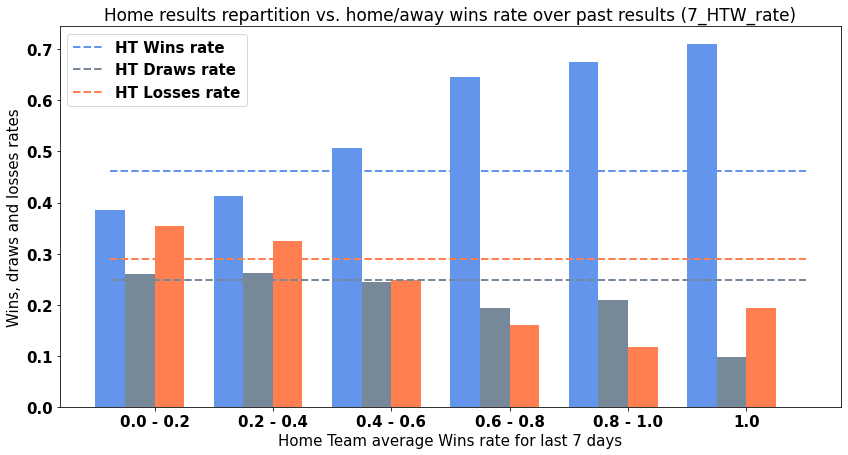

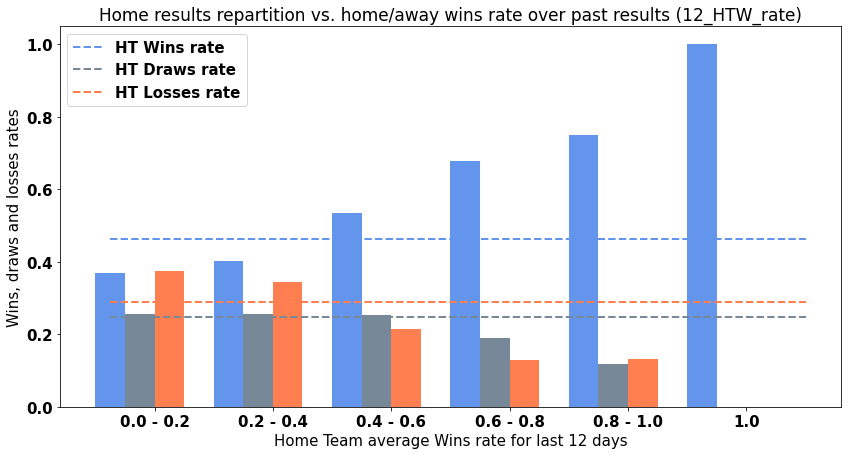

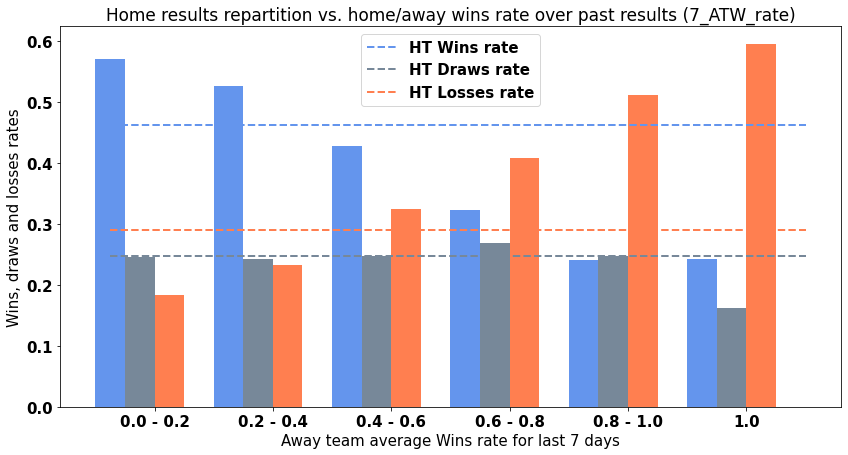

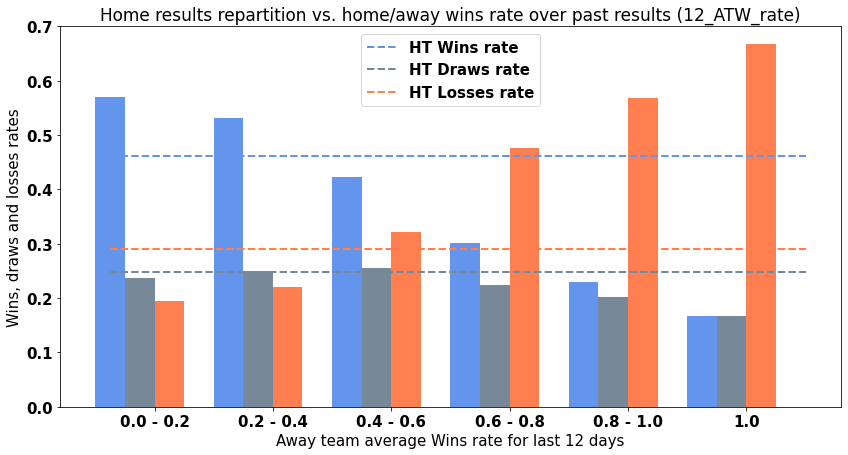

In [36]:

bars = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
width = (0.2 - 0.05)/3.0
xticks = np.array([0.025, 0.225, 0.425, 0.625, 0.825, 1.025])
xticksLabels = ['0.0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0', '1.0']
xlabels = ["Home Team average Wins rate for last 7 days", "Home Team average Wins rate for last 12 days", 
          "Away team average Wins rate for last 7 days", "Away team average Wins rate for last 12 days"]    
var_names = ['7_HTW_rate', '12_HTW_rate', '7_ATW_rate', '12_ATW_rate']
titles = ["Home results repartition vs. home/away wins rate over past results (" + var_name + ")" for var_name in var_names]


k=0
for var_name in var_names:
    
    fig = plt.figure()
    nonzero_bars = []
    nonzero_xticks = []
    HW_rates = []
    HD_rates = []
    
    for (bar, xtick) in zip(bars, xticks):
        if len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index) > 0:
            nonzero_xticks.append(xtick)
            HW_rates.append(len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2)) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index))
            HD_rates.append(len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2)) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index))
    
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
    plt.bar(np.array(nonzero_xticks), HW_rates, width, color = '#6495ED')
    plt.bar(np.array(nonzero_xticks) + width, HD_rates, width, color = '#778899')
    plt.bar(np.array(nonzero_xticks) + 2*width, HL_rates, width, color = '#FF7F50')
    plt.plot((0.025, 1.2), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
    plt.plot((0.025, 1.2), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
    plt.plot((0.025, 1.2), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)

    pylab.xticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1], xticksLabels)
    plt.xlabel(xlabels[k])
    plt.ylabel("Wins, draws and losses rates")
    plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"])
    plt.title(titles[k], fontsize=17)



    k += 1    
    
    

Text(0.5, 1.0, 'Elo score distribution histogram')

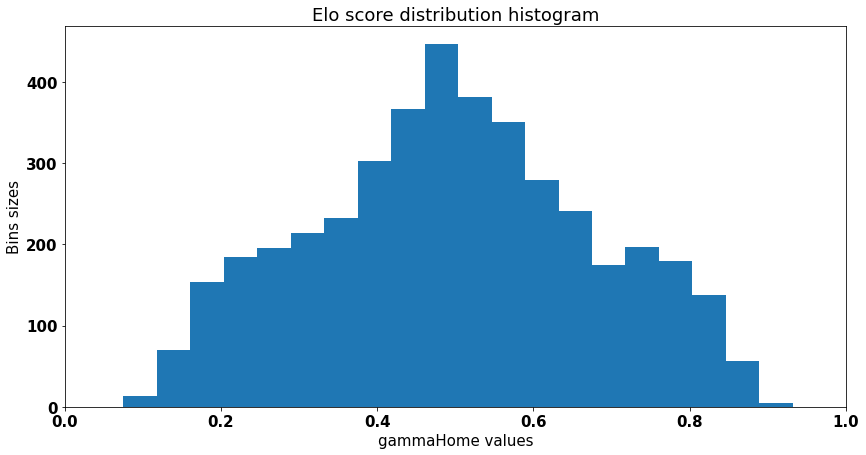

In [37]:
# Elo rank feature visualization

plt.hist(E0_data['gammaHome'].values, bins=20)
plt.xlabel("gammaHome values")
plt.ylabel("Bins sizes")
plt.xlim(0,1)
plt.title("Elo score distribution histogram")

Text(0.5, 1.0, 'Visualization of Elo scores evolution over seasons for Arsenal, Man United and Liverpool')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


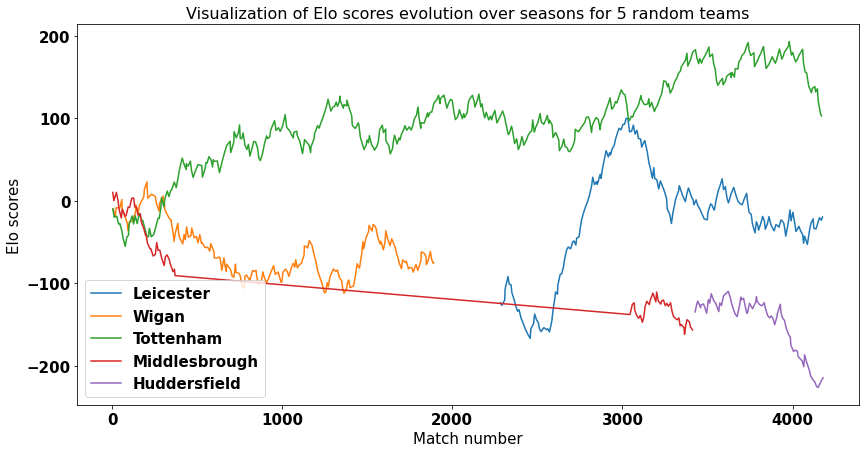

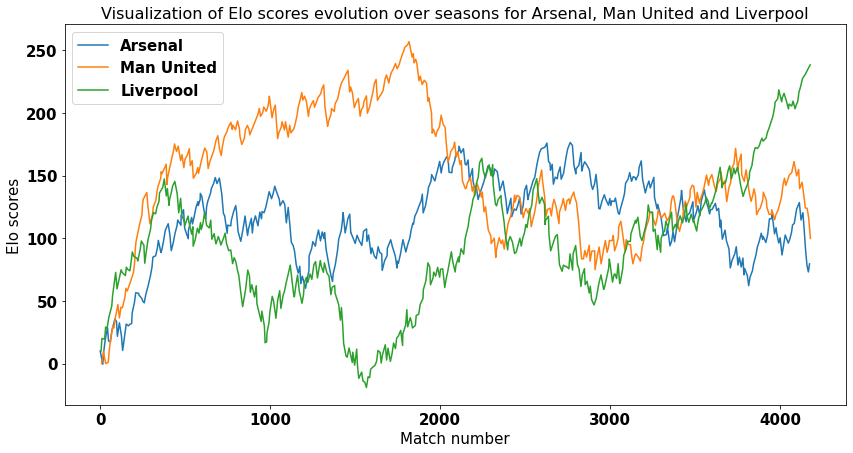

In [38]:
fig = plt.figure()
#random teams elo score visualization
random_teams = [teams[random.randint(0, len(teams))-1] for k in range(0,5)]
for team in random_teams:
    HomeEloScores = E0_data[E0_data['HomeTeam'] == team]['HTeamEloScore']
    AwayEloScores = E0_data[E0_data['AwayTeam'] == team]['ATeamEloScore']
    EloScores = pd.concat([HomeEloScores, AwayEloScores]).sort_index()
    EloScores.plot()
plt.legend(random_teams)
plt.xlabel('Match number')
plt.ylabel('Elo scores')
plt.title('Visualization of Elo scores evolution over seasons for 5 random teams', fontsize = 16)
    
fig = plt.figure()
for team in ['Arsenal', 'Man United', 'Liverpool']:
    HomeEloScores = E0_data[E0_data['HomeTeam'] == team]['HTeamEloScore']
    AwayEloScores = E0_data[E0_data['AwayTeam'] == team]['ATeamEloScore']
    EloScores = pd.concat([HomeEloScores, AwayEloScores]).sort_index()
    EloScores.plot()
plt.legend(['Arsenal', 'Man United', 'Liverpool'])
plt.xlabel('Match number')
plt.ylabel('Elo scores')
plt.title('Visualization of Elo scores evolution over seasons for Arsenal, Man United and Liverpool', fontsize=16)

Text(0.5, 1.0, 'Effect of gammaHome score match home results repartition')

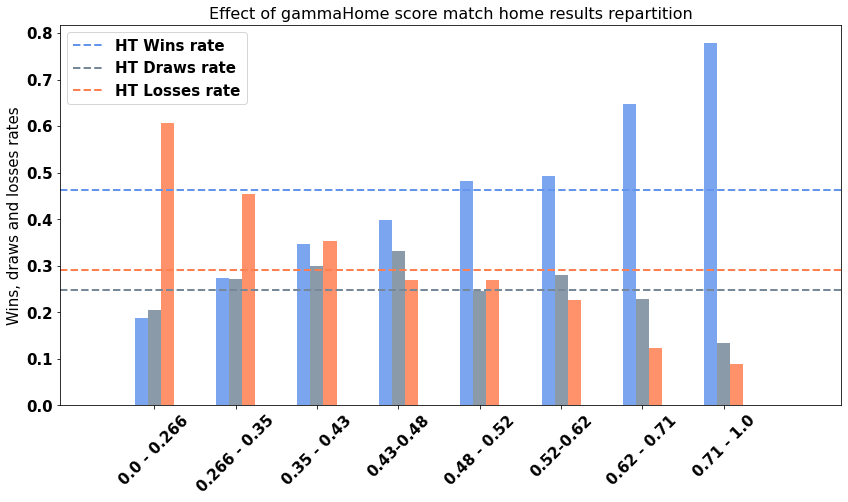

In [39]:

#we define bins of approximatively equal sizes in terms of Elo score
bars = [0.0, 0.266, 0.35, 0.43, 0.48, 0.52, 0.62, 0.71, 1.0]
bars_pos = [0.0 + k * (1.0/8.0) for k in range(1,9)]
width = 0.02
xticks = np.array([(bars[k+1] - bars[k])/2.0 for k in range(0, len(bars) - 1)])
xticksLabels = ['0.0 - 0.266', '0.266 - 0.35','0.35 - 0.43', '0.43-0.48', '0.48 - 0.52','0.52-0.62', '0.62 - 0.71', '0.71 - 1.0']
xlabels = ["Home Team average home-wins rate for last 5 days (at home)", "Away Team average away-wins rate for last 5 days (away)"]    

HW_rates = []
HD_rates = []
HL_rates = []

for k in range(0 , len(bars) - 1):
    HW_rates.append(len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1]) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1])].index))
    HD_rates.append(len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1]) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1])].index))
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
plt.bar(np.array(bars_pos), HW_rates, width, color = '#6495ED', alpha = 0.85)
plt.bar(np.array(bars_pos) + width, HD_rates, width, color = '#778899', alpha = 0.85)
plt.bar(np.array(bars_pos) + 2*width, HL_rates, width, color = '#FF7F50', alpha = 0.85)

plt.plot((0.0, 1.2), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
plt.plot((0.0, 1.2), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
plt.plot((0.0, 1.2), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)
    
plt.ylabel("Wins, draws and losses rates")
plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"])
plt.xlim(0,1.2)
pylab.xticks(np.array(bars_pos) + width, xticksLabels, rotation=45)
plt.title("Effect of gammaHome score match home results repartition", fontsize=16)


Text(0.5, 1.0, 'Influence of HTdaysSinceLastMatch over results repartition')

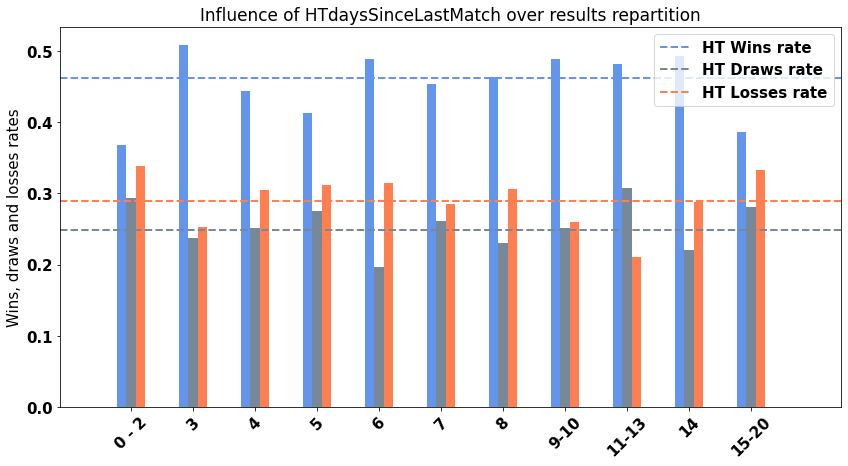

In [40]:
fig = plt.figure()

#we define bins of minimum size for HTdaysSinceLastMatch
bins = [0, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 21]
bars_pos = [0.0 + k * (20/12.0) for k in range(1,12)]
width = 0.25
xticksLabels = ['0 - 2', '3', '4', '5', '6', '7','8', '9-10', '11-13', '14', '15-20']

HW_rates = []
HD_rates = []
HL_rates = []

for k in range(0 , len(bins) - 1):
    HW_rates.append(len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1]) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1])].index))
    HD_rates.append(len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1]) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1])].index))
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
plt.bar(np.array(bars_pos), HW_rates, width, color = '#6495ED')
plt.bar(np.array(bars_pos) + width, HD_rates, width, color = '#778899')
plt.bar(np.array(bars_pos) + 2*width, HL_rates, width, color = '#FF7F50')

plt.plot((0.0, 21), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
plt.plot((0.0, 21), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
plt.plot((0.0, 21), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)

pylab.xticks(np.array(bars_pos) + width, xticksLabels, rotation=45)
plt.ylabel("Wins, draws and losses rates")
plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"])
plt.xlim(0,21)
plt.title("Influence of HTdaysSinceLastMatch over results repartition", fontsize = 17)



In [41]:
E0_data_copy = E0_data[['HW', 'AW', 'D',
                        'gammaHome',
                        'DaysSinceLastMatchRate',
                        'HTW_rate', 'HTD_rate', 'HTL_rate',
                        'ATW_rate', 'ATD_rate', 'ATL_rate',
                        'HTHW_rate', 'HTHD_rate', 'HTHL_rate',
                        'ATAW_rate', 'ATAD_rate', 'ATAL_rate',
                        '1_last_HTR', '2_last_HTR',
                        '1_last_ATR', '2_last_ATR',
                        '1_last_HTHR', '2_last_HTHR',
                        '1_last_ATAR', '2_last_ATAR',
                        '7_HTW_rate', '12_HTW_rate', 
                        '7_ATW_rate', '12_ATW_rate', 
                        '7_HTL_rate', '12_HTL_rate', 
                        '7_ATL_rate', '12_ATD_rate',
                        '7_HTD_rate', '12_HTD_rate',
                        '7_ATD_rate', '7_ATD_rate',
                       '5_HTHW_rate', '5_ATAW_rate']]

#make dummies variables for the past results indicators features (3 for W, D and L)
E0_data_copy.loc[:, '1_last_HTRisW'] = E0_data_copy['1_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_HTRisD'] = E0_data_copy['1_last_HTR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_HTRisL'] = E0_data_copy['1_last_HTR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_HTRisW'] = E0_data_copy['2_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_HTRisD'] = E0_data_copy['2_last_HTR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_HTRisL'] = E0_data_copy['2_last_HTR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '1_last_ATRisW'] = E0_data_copy['1_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_ATRisD'] = E0_data_copy['1_last_ATR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_ATRisL'] = E0_data_copy['1_last_ATR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_ATRisW'] = E0_data_copy['2_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_ATRisD'] = E0_data_copy['2_last_ATR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_ATRisL'] = E0_data_copy['2_last_ATR'].map(lambda x : 1 if x == 'L' else 0)

E0_data_copy.loc[:, '1_last_HTHRisW'] = E0_data_copy['1_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_HTHRisD'] = E0_data_copy['1_last_HTHR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_HTHRisL'] = E0_data_copy['1_last_HTHR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_HTHRisW'] = E0_data_copy['2_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_HTHRisD'] = E0_data_copy['2_last_HTHR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_HTHRisL'] = E0_data_copy['2_last_HTHR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '1_last_ATARisW'] = E0_data_copy['1_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_ATARisD'] = E0_data_copy['1_last_ATAR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_ATARisL'] = E0_data_copy['1_last_ATAR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_ATARisW'] = E0_data_copy['2_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_ATARisD'] = E0_data_copy['2_last_ATAR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_ATARisL'] = E0_data_copy['2_last_ATAR'].map(lambda x : 1 if x == 'L' else 0)

#under matrix form
corr = E0_data_copy.corr()
print(corr)

                              HW        AW         D  gammaHome  DaysSinceLastMatchRate  HTW_rate  HTD_rate  ...  2_last_HTHRisL  1_last_ATARisW  1_last_ATARisD  1_last_ATARisL  2_last_ATARisW  2_last_ATARisD  2_last_ATARisL
HW                      1.000000 -0.592128 -0.532247   0.366396               -0.033544  0.221596 -0.026688  ...       -0.066104       -0.070151       -0.003654        0.061765       -0.086664       -0.000826        0.070928
AW                     -0.592128  1.000000 -0.367060  -0.346192                0.034449 -0.188419  0.023605  ...        0.050667        0.073231       -0.003597       -0.062999        0.103644       -0.017758       -0.077802
D                      -0.532247 -0.367060  1.000000  -0.059240                0.002650 -0.058439  0.006082  ...        0.023077        0.004042        0.007997       -0.005111       -0.008847        0.019609       -0.000137
gammaHome               0.366396 -0.346192 -0.059240   1.000000               -0.098302  0.554145 -0

c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


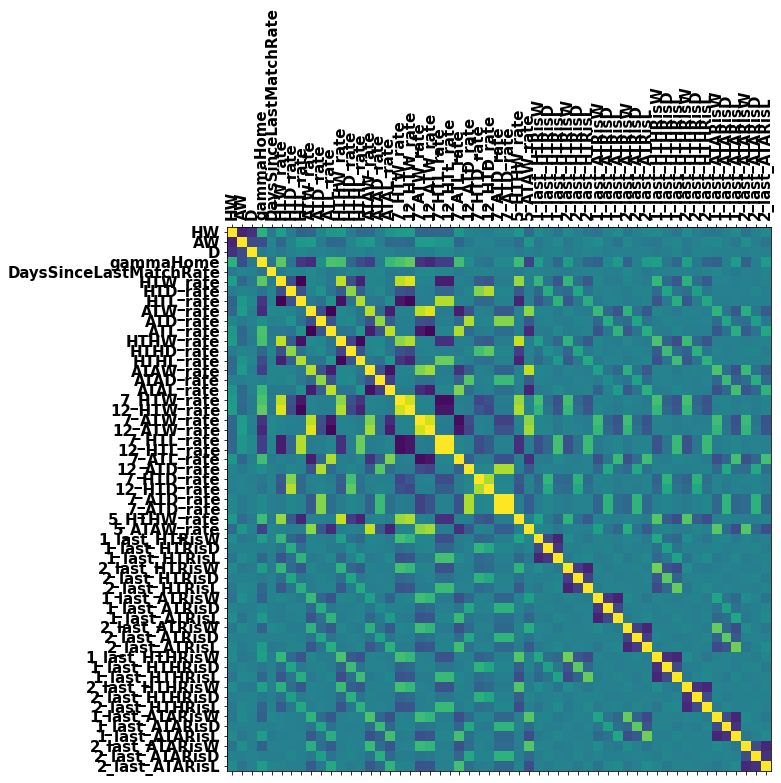

In [42]:

#and in a more understandable and graphical form
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(E0_data_copy)


In [43]:
eloSeasons = [2005, 2006, 2007, 2008]
trainingSeasons = [2009, 2010, 2011, 2012, 2013, 2014, 2015]
testSeasons = [2016, 2017,2018]

In [44]:
# Folds generations custom function 


def foldsGenerator(ixSet, foldMinSize, foldMaxSize, trInitSize, trOptimalSize = -1):
    
    subsetsList = []
    subsetsList.append(ixSet[0:trInitSize])
    Nsubsets = 1
    
    ixSetLength = ixSet.size
    
    unfoldedSetSize = ixSetLength - trInitSize
    prevSubsetStop = trInitSize
    
    while (unfoldedSetSize > foldMaxSize):
        nextFoldSize = random.randint(foldMinSize, foldMaxSize)
        
        subsetsList.append(ixSet[prevSubsetStop:(prevSubsetStop + nextFoldSize)])
        
        unfoldedSetSize -= nextFoldSize
        prevSubsetStop += nextFoldSize
        Nsubsets += 1
    
    subsetsList.append(ixSet[prevSubsetStop:])
    Nsubsets += 1    
    return (Nsubsets, subsetsList)

#test
#sub = foldsGenerator(E0_data_tr.index, 40, 55, 700)


In [46]:
#Scores functions implementation

def brierScore(probW, probL, probD, true, classLabels):
    
    trueW = true.map(lambda x : 1 if x == classLabels['W'] else 0).values
    trueL = true.map(lambda x : 1 if x == classLabels['L'] else 0).values
    trueD = true.map(lambda x : 1 if x == classLabels['D'] else 0).values
    
    cumulScore = (probW - trueW)*(probW - trueW) + (probL - trueL)*(probL - trueL) + (probD - trueD)*(probD - trueD)
    
    return float(np.sum(cumulScore))/float(true.index.size)

def rankProbabilityScore(probW, probL, probD, true, classLabels):
    trueW = true.map(lambda x : 1 if x == classLabels['W'] else 0).values
    trueL = true.map(lambda x : 1 if x == classLabels['L'] else 0).values
    trueD = true.map(lambda x : 1 if x == classLabels['D'] else 0).values
    
    true1 = trueL
    true2 = trueL + trueD
    
    prob1 = probL
    prob2 = probL + probD
    
    cumulScore = (prob1 - true1)*(prob1 - true1) + (prob2 - true2) * (prob2 - true2)
    
    return(float(np.sum(cumulScore))/(2.0 * float(true.index.size)))

In [47]:
# Score estimation function 
from sklearn import linear_model
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn import preprocessing

def crossValidation(predictors, labels, classLabels, foldGenParams, fitPredFun, fittingParams, scoreFunList, NObsMax = -1):
    
    (Nfold, subsetsList) = foldsGenerator(labels.index, foldGenParams['foldMinSize'], 
                                          foldGenParams['foldMaxSize'], foldGenParams['trInitSize'])
    trSubset = []
    validSubset = subsetsList.pop(0)
    
    k=0
    avScores = np.zeros(3 + len(scoreFunList))
    while (len(subsetsList) > 0) :
        if (k == 0):                
            trSubset = validSubset
        else:
            trSubset = trSubset.append(validSubset)
        if (NObsMax != (-1)):
            trSubset = trSubset[-NObsMax:]
        
        validSubset = subsetsList.pop(0)
    
        predictors_tr = predictors.loc[trSubset,:]
        predictors_val = predictors.loc[validSubset,:]
        labels_tr = labels.loc[trSubset]
        labels_val = labels.loc[validSubset]

        #model fitting + probabilities prediction
        (predLabels, probW, probL, probD) = fitPredFun(predictors_tr, labels_tr, predictors_val, labels_val, fittingParams)

        scores = []
        scores.append(float(len(predictors_val.index)) * accuracy_score(predLabels, labels_val.values))
        if len(labels_val.unique()) > 2:
            scores.append(float(len(predictors_val.index)) * precision_score(predLabels, labels_val, average='weighted'))
            scores.append(float(len(predictors_val.index)) * recall_score(predLabels, labels_val, average='weighted'))
        else:
            scores.append(float(len(predictors_val.index)) * precision_score(predLabels, labels_val, pos_label='W'))
            scores.append(float(len(predictors_val.index)) * recall_score(predLabels, labels_val, pos_label='W'))
        
        for scoreFun in scoreFunList:
            scores.append(float(len(predictors_val.index)) * scoreFun(probW, probL, probD, labels_val, classLabels))
        print(scoreFun(probW, probL, probD, labels_val, classLabels))
        avScores = avScores + np.array(scores)
        
        k += 1
    return avScores/float(len(labels.index) - foldGenParams['trInitSize'])


In [314]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from IPython.display import display

#Create X and Y
X = pd.get_dummies(E0_data[['HomeTeam', 'AwayTeam', 'HTeamEloScore', 'ATeamEloScore', 'HTdaysSinceLastMatch',
                            'ATdaysSinceLastMatch', 'HTdaysSinceLastMatch', 'ATdaysSinceLastMatch', 'HTW_rate', 'ATW_rate',
                            'ATD_rate', 'HTD_rate', '1_last_HTR_isW', '1_last_HTR_isL', '1_last_ATR_isW', '1_last_ATR_isL']])
Y = E0_data[['FTR']]

#X preprocessing
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)

#Split X and Y into training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(X_imputed, Y, shuffle=True)

#Logistic Regression Model Setup
model = LogisticRegression()
model.fit(x_train, y_train)

#Logistic Regression Model Metrics
print("Logestic Regression")
print("Train Score: ", model.score(x_train, y_train))
print("Test Score: ", model.score(x_test, y_test))
print(classification_report(y_test, model.predict(x_test), digits=3))

#Forest model setup
forest = RandomForestClassifier(n_estimators=2, random_state=2)
forest.fit(x_train, y_train)

#Forest Model Metrics
print("Forest Classifier")
print("Train Score: ", forest.score(x_train, y_train))
print("Test Score: ", forest.score(x_test, y_test))
print(classification_report(y_test, forest.predict(x_test), digits=3))

print(y_test.shape)
print(forest.predict(x_test).shape)

c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logestic Regression
Train Score:  0.5859649122807018
Test Score:  0.5444976076555024
              precision    recall  f1-score   support

           A      0.526     0.539     0.532       297
           D      0.333     0.068     0.113       279
           H      0.570     0.832     0.676       469

    accuracy                          0.544      1045
   macro avg      0.477     0.479     0.441      1045
weighted avg      0.494     0.544     0.485      1045

Forest Classifier
Train Score:  0.8009569377990431
Test Score:  0.41818181818181815
              precision    recall  f1-score   support

           A      0.386     0.596     0.469       297
           D      0.263     0.283     0.273       279
           H      0.631     0.386     0.479       469

    accuracy                          0.418      1045
   macro avg      0.427     0.422     0.407      1045
weighted avg      0.463     0.418     0.421      1045

(1045, 1)
(1045,)


c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [167]:
pd.set_option('display.max_columns', None)

display(E0_data.head(20))

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTAG,B365A,B365D,B365H,BSA,BSD,BSH,BWA,BWD,BWH,GBA,GBD,GBH,IWA,IWD,IWH,LBA,LBD,LBH,PSA,PSD,PSH,SBA,SBD,SBH,SJA,SJD,SJH,VCA,VCD,VCH,WHA,WHD,WHH,matchID,Season,HomeTeamDay,AwayTeamDay,ones,HomeTeamHomeDay,AwayTeamAwayDay,HW,AW,D,HR,AR,ordinalHR,1_last_HTR,2_last_HTR,3_last_HTR,1_last_ATR,2_last_ATR,3_last_ATR,1_last_HTHR,2_last_HTHR,1_last_ATAR,2_last_ATAR,HTW_rate,ATW_rate,HTD_rate,ATD_rate,7_HTW_rate,12_HTW_rate,7_ATW_rate,12_ATW_rate,7_HTD_rate,12_HTD_rate,7_ATD_rate,12_ATD_rate,5_HTHW_rate,5_ATAW_rate,HTHW_rate,HTHD_rate,ATAW_rate,ATAD_rate,7_HTL_rate,12_HTL_rate,7_ATL_rate,12_ATL_rate,HTL_rate,ATL_rate,HTHL_rate,ATAL_rate,HTeamEloScore,ATeamEloScore,gammaHome,HTLastMatchDate,ATLastMatchDate,HTdaysSinceLastMatch,ATdaysSinceLastMatch,DaysSinceLastMatchRate,1_last_HTR_isW,1_last_HTR_isL,2_last_HTR_isW,2_last_HTR_isL,3_last_HTR_isW,3_last_HTR_isL,1_last_ATR_isW,1_last_ATR_isL,2_last_ATR_isW,2_last_ATR_isL,3_last_ATR_isW,3_last_ATR_isL,1_last_HTHR_isW,1_last_HTHR_isL,2_last_HTHR_isW,2_last_HTHR_isL,1_last_ATAR_isW,1_last_ATAR_isL,2_last_ATAR_isW,2_last_ATAR_isL
0,2008-08-16,Arsenal,West Brom,1,0,H,0,15.00,6.50,1.20,13.00,5.00,1.22,10.00,5.50,1.22,13.00,5.50,1.22,11.00,5.2,1.20,11.00,5.00,1.20,NaN,NaN,NaN,12.00,5.50,1.20,12.00,5.50,1.20,13.00,6.00,1.25,12.00,5.50,1.17,0,2008,1,1,1,1.0,1.0,1,0,0,W,L,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,-10.000000,0.500000,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2008-08-16,Bolton,Stoke,3,1,H,0,4.50,3.50,1.83,4.33,3.25,1.80,4.40,3.30,1.75,4.50,3.25,1.83,4.20,3.3,1.75,4.00,3.40,1.73,NaN,NaN,NaN,4.20,3.25,1.80,4.33,3.20,1.80,4.80,3.40,1.85,4.00,3.10,1.80,1,2008,1,1,1,1.0,1.0,1,0,0,W,L,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,-10.000000,0.500000,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2008-08-16,Everton,Blackburn,2,3,A,1,4.00,3.30,2.00,3.50,3.25,2.00,4.00,3.25,1.85,3.75,3.25,2.00,3.30,3.2,2.00,4.00,3.20,1.80,NaN,NaN,NaN,3.75,3.25,1.90,3.40,3.25,2.00,4.00,3.30,2.05,3.50,3.10,1.95,2,2008,1,1,1,1.0,1.0,0,1,0,L,W,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.000000,10.000000,0.500000,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2008-08-16,Hull,Fulham,2,1,H,1,2.80,3.20,2.60,2.50,3.25,2.60,2.65,3.15,2.45,2.60,3.25,2.60,2.60,3.2,2.40,2.50,3.25,2.40,NaN,NaN,NaN,2.60,3.20,2.50,2.75,3.20,2.38,2.80,3.40,2.60,2.62,2.90,2.50,3,2008,1,1,1,1.0,1.0,1,0,0,W,L,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,-10.000000,0.500000,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008-08-16,Middlesbrough,Tottenham,2,1,H,0,2.25,3.40,3.20,2.30,3.25,2.80,2.30,3.20,2.80,2.30,3.25,3.00,2.20,3.2,2.90,2.20,3.20,2.80,NaN,NaN,NaN,2.30,3.20,2.80,2.20,3.40,2.88,2.30,3.40,3.20,2.15,3.20,2.90,4,2008,1,1,1,1.0,1.0,1,0,0,W,L,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,-10.000000,0.500000,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2008-08-16,Sunderland,Liverpool,0,1,A,0,1.67,3.60,5.50,1.73,3.40,4.50,1.67,3.35,5.00,1.70,3.40,5.00,1.65,3.5,4.50,1.67,3.30,4.50,NaN,NaN,NaN,1.65,3.40,5.00,1.73,3.40,4.33,1.65,3.80,5.50,1.57,3.30,5.50,5,2008,1,1,1,1.0,1.0,0,1,0,L,W,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.000000,10.000000,0.500000,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2008-08-16,West Ham,Wigan,2,1,H,0,4.20,3.40,1.91,3.80,3.25,1.9

In [321]:
import tensorflow.compat.v1 as tf

#make TF work like the TF in the HWs
tf.disable_v2_behavior()

#Other feature selections
'''#X = pd.get_dummies(E0_data[['HomeTeam', 'AwayTeam', 'HTeamEloScore', 'ATeamEloScore', 'HTdaysSinceLastMatch',
                            'ATdaysSinceLastMatch']])
X = pd.get_dummies(E0_data[['HomeTeam', 'AwayTeam', 'FTAG', 'FTHG']])
X = pd.get_dummies(E0_data[['HomeTeam', 'AwayTeam', 'FTR']])
X = pd.get_dummies(E0_data.drop(['FTR',  'HTAG', 'Date', 'matchID', 'HW', 'AW', 'D', 'AR',
                                 'ordinalHR', 'Season'], axis=1))'''

#Setup Data
X = pd.get_dummies(E0_data[['HomeTeam', 'AwayTeam', 'HTeamEloScore', 'ATeamEloScore', 'HTdaysSinceLastMatch',
                            'ATdaysSinceLastMatch', 'HTdaysSinceLastMatch', 'ATdaysSinceLastMatch', 'HTW_rate', 'ATW_rate',
                            'ATD_rate', 'HTD_rate', '1_last_HTR_isW', '1_last_HTR_isL', '1_last_ATR_isW', '1_last_ATR_isL']])
Y = E0_data[['ordinalHR']].to_numpy().ravel()*2



#X preprocessing
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)

#Split X and Y into training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(X_imputed, Y, shuffle=True)

#Neural Network Setup
n_inputs = X.shape[1]
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 3

#Tensorflow X and Y
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
Y = tf.placeholder(tf.int32, shape = (None), name = 'Y')

#Function used to better display model metrics
def convert_ordinalHR(x):
    y=[]
    for i in range(x.size):
        if x[i] == 0:
            y.append('A')
        elif x[i] == 2:
            y.append('H')
        elif x[i] == 1:
            y.append('D')
    return y

#General Function for neural layer setup
def neuron_layer(X, n_neurons, name, activation = None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs + n_neurons)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name = 'kernel')
        b = tf.Variable(tf.zeros([n_neurons]), name='bias')
        L2 = tf.nn.l2_loss(W)
        Z = tf.matmul(X,W)+b
        if activation is not None:
            return activation(Z), L2
        else:
            return Z, L2

#Tensorflow neural layer setup
with tf.name_scope('dnn'):
    hidden1, L2_1 = neuron_layer(X, n_hidden1, name='hidden1', activation=tf.nn.relu)
    hidden2, L2_2 = neuron_layer(hidden1, n_hidden2, name='hidden2', activation=tf.nn.relu)
    logits, L2_3 = neuron_layer(hidden2, n_outputs, name='outputs', activation=None)



#Loss function
beta=0.01
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = Y, logits=logits)
    loss = tf.reduce_mean(xentropy+beta*(L2_1+L2_2+L2_3), name='loss')
    


#Optimizer
learning_rate = 0.01
with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

#Metric analysis setup
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, Y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    preds = tf.argmax(input=logits, axis=1)
    
#Initialize the above tensorflow variables    
init = tf.global_variables_initializer()

#Runtime and batchsetup
n_epochs = 10000
batch_size = 50

#Run the model
with tf.Session() as sess:
    init.run()
    #Model Loop
    for epoch in range(n_epochs):
        sess.run(training_op, feed_dict={X: x_train, Y: y_train})
        acc_train = accuracy.eval(feed_dict={X: x_train, Y: y_train})
        acc_val = accuracy.eval(feed_dict={X: x_test, Y: y_test})
        if(epoch % 200 == 0 or epoch==n_epochs-1):
            print(epoch, 'Train accuracy:', acc_train, 'Val accuracy:', acc_val)
    
    #Retrive Metrics
    acc_val = accuracy.eval(feed_dict={X: x_test, Y: y_test})
    preds = preds.eval(feed_dict = {X:x_test})
    log = logits.eval(feed_dict = {X:x_test})
    preds=convert_ordinalHR(preds)
    y_test=convert_ordinalHR(y_test)
    
    #Print Metrics
    print('Train accuracy:', acc_train, 'Val accuracy:', acc_val)
    print(classification_report(y_test, preds, digits=3))

0 Train accuracy: 0.29633173 Val accuracy: 0.2708134
200 Train accuracy: 0.5859649 Val accuracy: 0.55311006
400 Train accuracy: 0.58341306 Val accuracy: 0.5598086
600 Train accuracy: 0.5859649 Val accuracy: 0.5598086
800 Train accuracy: 0.58500797 Val accuracy: 0.5617225
1000 Train accuracy: 0.58787876 Val accuracy: 0.55885166
1200 Train accuracy: 0.58979267 Val accuracy: 0.56076556
1400 Train accuracy: 0.5869219 Val accuracy: 0.5674641
1600 Train accuracy: 0.5891547 Val accuracy: 0.56650716
1800 Train accuracy: 0.58787876 Val accuracy: 0.5617225
2000 Train accuracy: 0.5904306 Val accuracy: 0.56363636
2200 Train accuracy: 0.5917065 Val accuracy: 0.56363636
2400 Train accuracy: 0.5901116 Val accuracy: 0.5569378
2600 Train accuracy: 0.5929825 Val accuracy: 0.55598086
2800 Train accuracy: 0.59266347 Val accuracy: 0.5617225
3000 Train accuracy: 0.5952153 Val accuracy: 0.5626794
3200 Train accuracy: 0.59106857 Val accuracy: 0.56076556
3400 Train accuracy: 0.59712917 Val accuracy: 0.5626794
